In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/madih/Downloads/train.csv')

# Explore Dataset

In [3]:
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
# unique values in each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

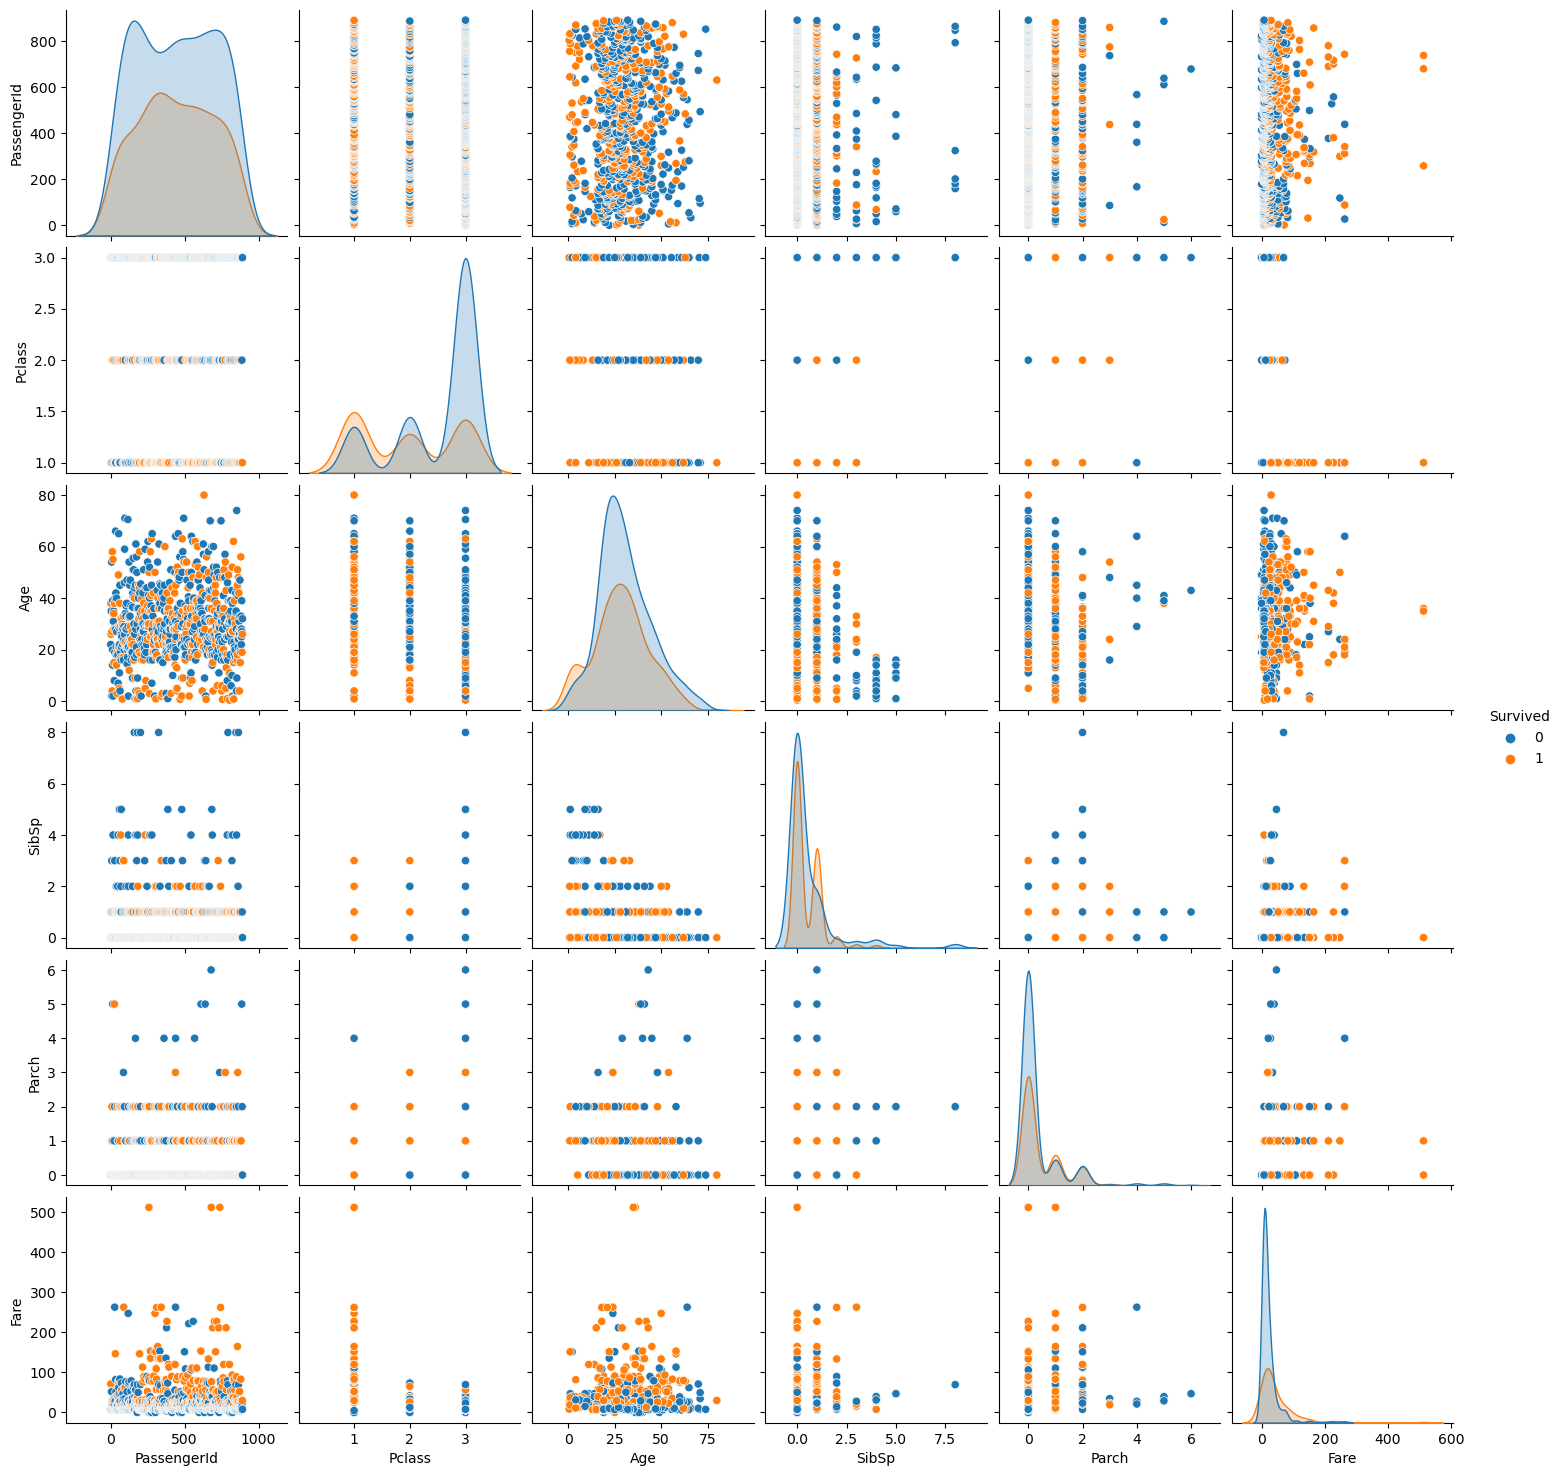

In [8]:
sb.pairplot(df, hue='Survived')

# Explore each feature

### Explore Survive column

In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

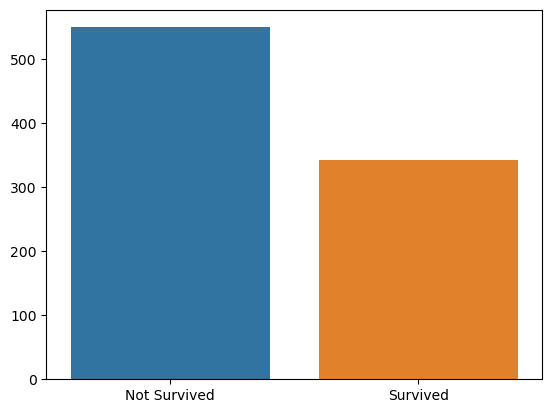

In [10]:
sb.barplot(x = ['Not Survived', 'Survived'], 
            y = df.Survived.value_counts().values)

### Explore Pclass column

In [11]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

([<matplotlib.patches.Wedge at 0x18544edf970>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.7%')])

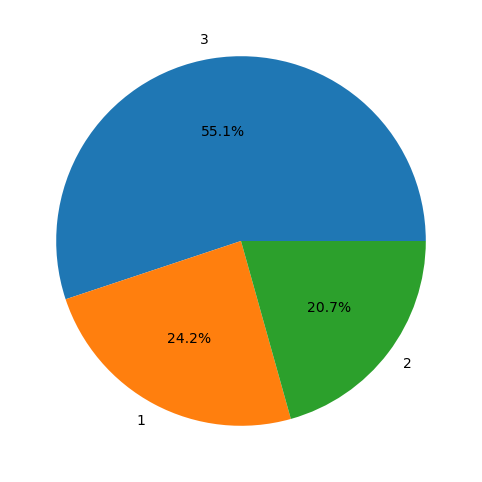

In [12]:
plt.figure(figsize=(12,6))
labels = df.Pclass.value_counts().index 
plt.pie(df.Pclass.value_counts(), labels = labels, autopct='%1.1f%%' )

Text(0.5, 1.0, 'Pclass:Survived vs Dead')

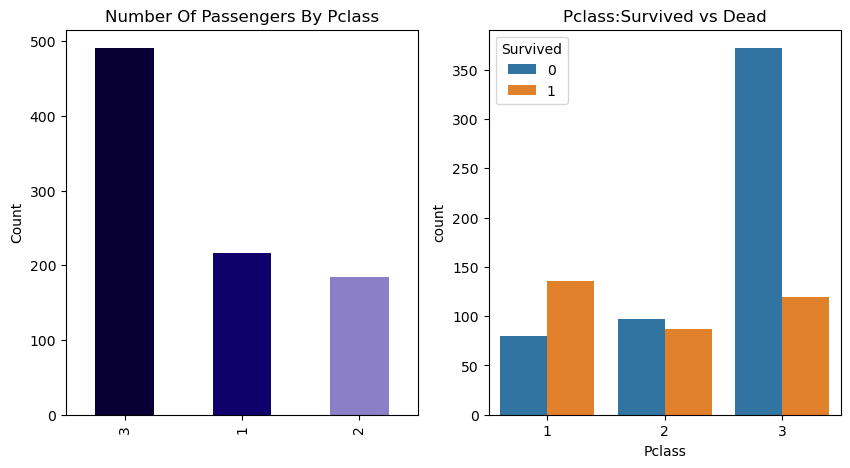

In [13]:
# create subplot plot
f,ax=plt.subplots(1,2,figsize=(10,5))

data['Pclass'].value_counts().plot.bar(color=['#080035','#0F006B','#8B80C7'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# create count plot
sb.countplot(x='Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

### Explore Sex column

In [14]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Sex:Survived vs Dead')

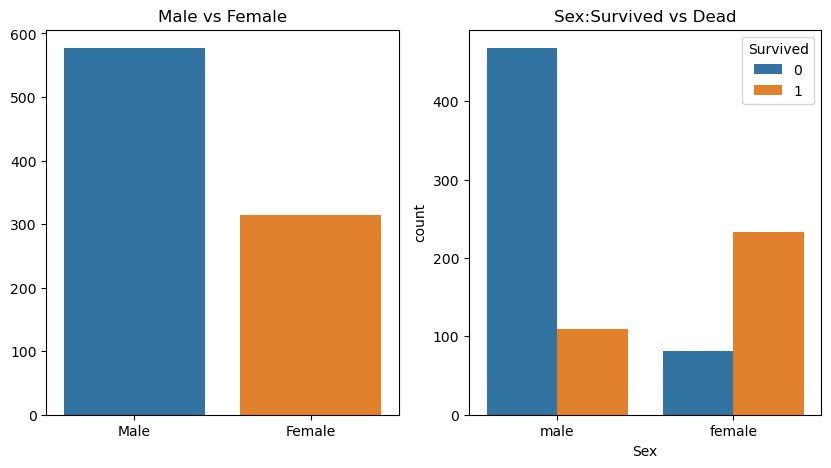

In [15]:
#create a subplot
f,ax=plt.subplots(1,2,figsize=(10,5))

sb.barplot(x = ['Male', 'Female'], y = df.Sex.value_counts().values, ax=ax[0])
ax[0].set_title('Male vs Female')

# create count plot
sb.countplot(x='Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

### Explore age column

In [16]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
df.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

(array([ 64., 115., 230., 155.,  86.,  42.,  17.,   5.]),
 array([ 0.42  , 10.3675, 20.315 , 30.2625, 40.21  , 50.1575, 60.105 ,
        70.0525, 80.    ]),
 <BarContainer object of 8 artists>)

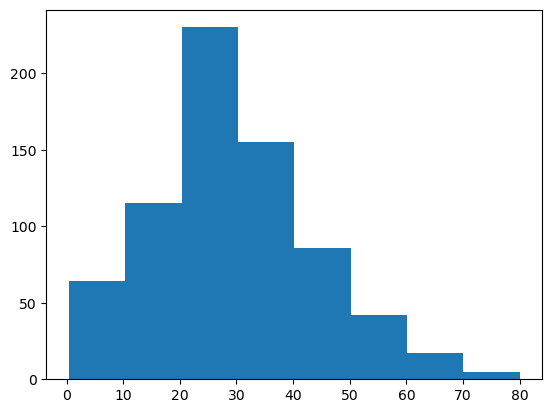

In [18]:
plt.hist(df.Age, bins = 8)

<AxesSubplot:>

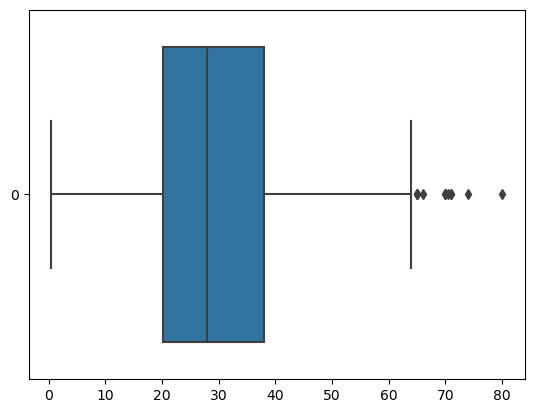

In [19]:
sb.boxplot(data = df.Age, orient='horizontal')

### Explore SibSp column

In [20]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:>

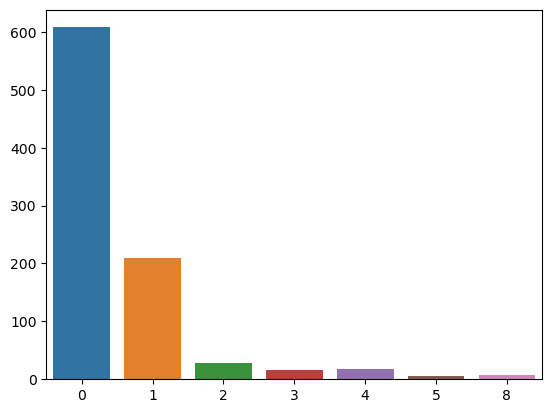

In [21]:
sb.barplot(x = df.SibSp.value_counts().index, y = df.SibSp.value_counts().values)

### Explore Parent child column

In [22]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:>

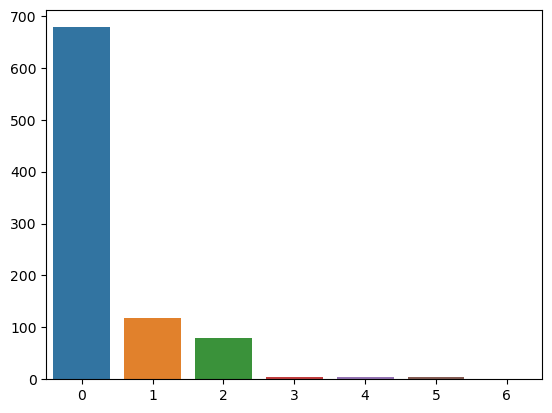

In [23]:
sb.barplot(x = df.Parch.value_counts().index, y = df.Parch.value_counts().values)

### Explore Embarked column

In [24]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

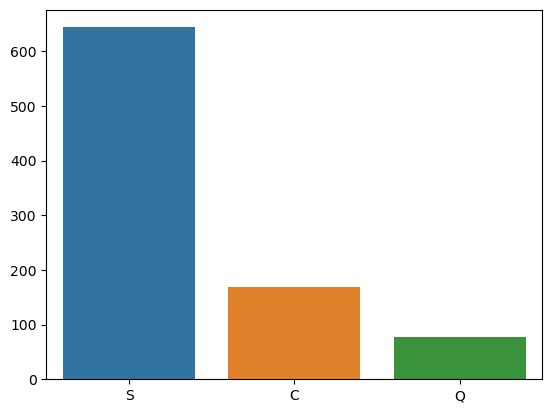

In [25]:
sb.barplot(x = df.Embarked.value_counts().index, y = df.Embarked.value_counts().values)

### Explore fare child column

In [26]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

(array([838.,  33.,  17.,   0.,   3.]),
 array([  0.     , 102.46584, 204.93168, 307.39752, 409.86336, 512.3292 ]),
 <BarContainer object of 5 artists>)

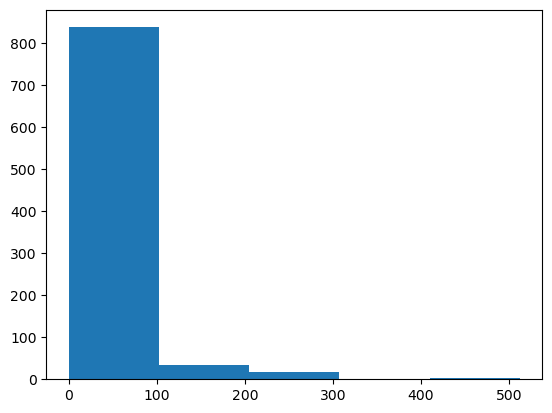

In [27]:
plt.hist(df.Fare, bins = 5)

<AxesSubplot:>

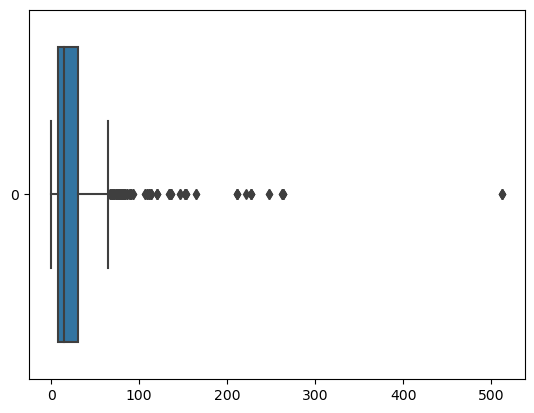

In [28]:
sb.boxplot(data = df.Fare, orient='horizontal')

### Survival rate of different age

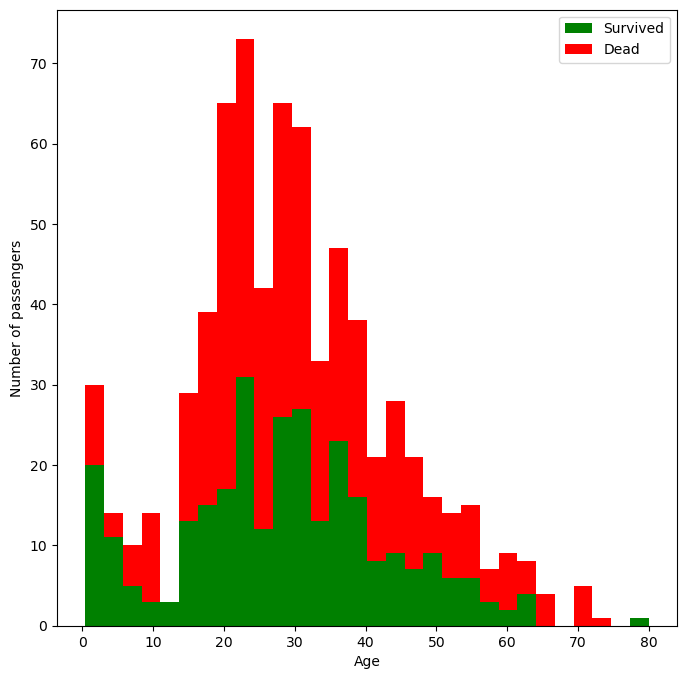

In [29]:
figure = plt.figure(figsize=(8,8))
withAge = (df[df['Age'].notnull()])
plt.hist([withAge[withAge['Survived']==1]['Age'], withAge[withAge['Survived']==0]['Age']], stacked=True, color = ['g','r'],bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

### Age, Pclass, and Survived column

Text(0.5, 1.0, 'Survival Rate in Pclass with age')

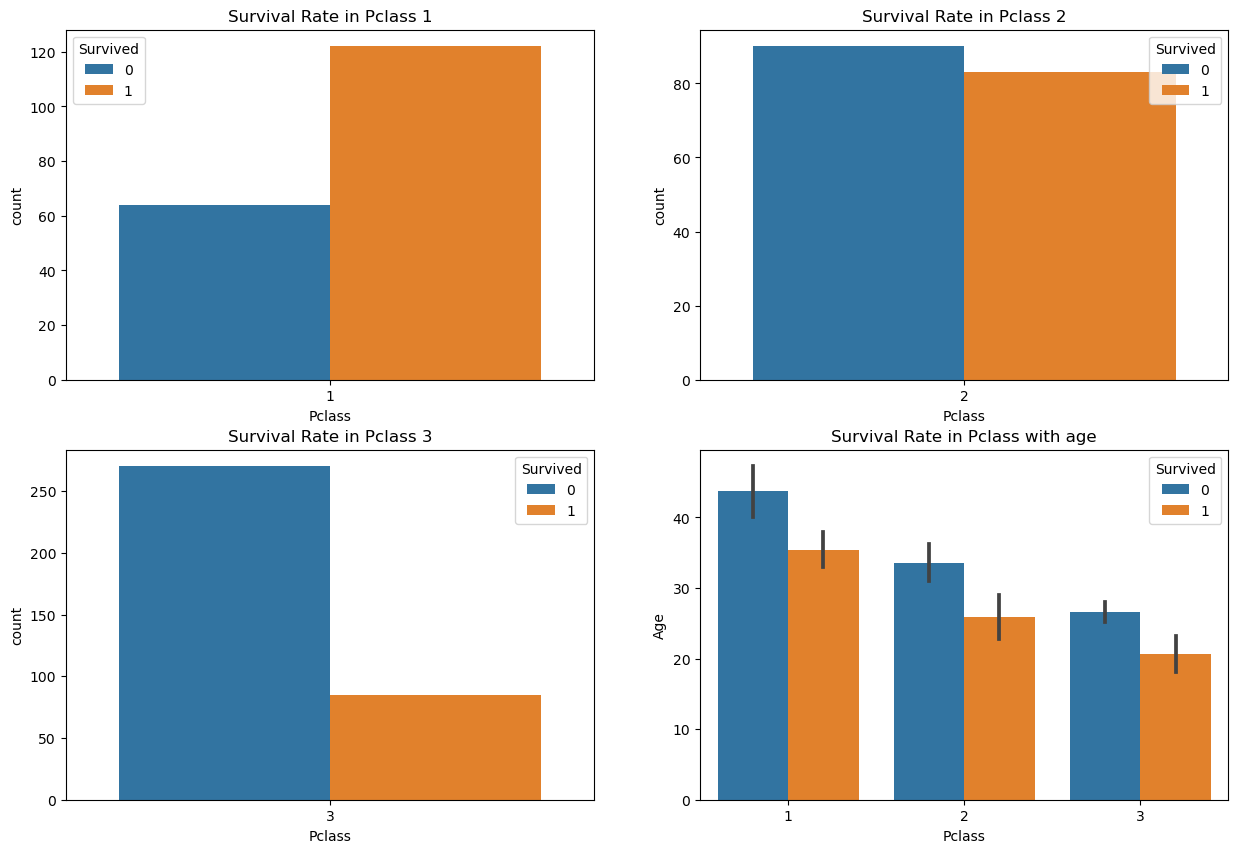

In [30]:
# create subplot plot for each pclass where age is not null
f,ax=plt.subplots(2,2,figsize=(15,10))

# age without null values
withAge = (df[df['Age'].notnull()])

# pclass 1
sb.countplot(data=df, x=withAge[withAge['Pclass']==1.0]['Pclass'], hue="Survived", ax=ax[0,0])
ax[0,0].set_title('Survival Rate in Pclass 1')

# pclass 2
sb.countplot(x=withAge[withAge['Pclass']==2.0]['Pclass'],hue='Survived',data=data,ax=ax[0,1])
ax[0,1].set_title('Survival Rate in Pclass 2')

# pclass 3
sb.countplot(x=withAge[withAge['Pclass']==3.0]['Pclass'],hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Survival Rate in Pclass 3')

# box plot for pclass survival rate with age
sb.barplot(x=withAge['Pclass'], y='Age', hue='Survived', data = df, ax=ax[1,1] ) 
ax[1,1].set_title('Survival Rate in Pclass with age')

### Pclass, Embarked, and survived feature when age is not null

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

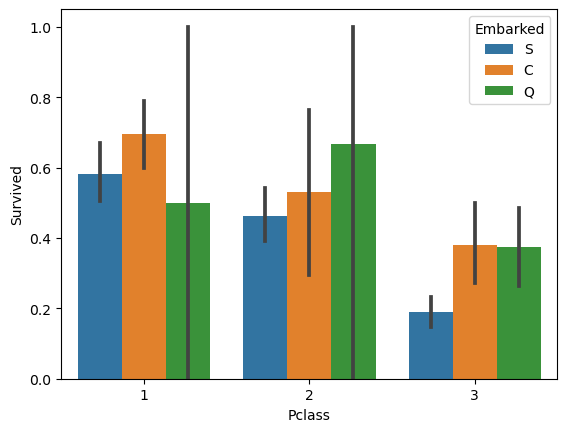

In [31]:
withAge = (df[df['Age'].notnull()])
sb.barplot(x = "Pclass", y = "Survived", hue = "Embarked", data = df)

### Age mean by Pclass and Sex

In [32]:
(df.groupby(['Pclass', 'Sex']))['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

# Handling with missing values

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

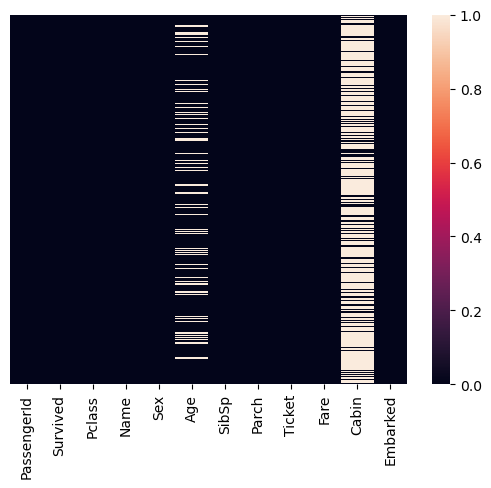

In [34]:
sb.heatmap(df.isnull(),yticklabels=False)

## Fill Age column missing values

Age mean

In [35]:
age_mean = df.Age.fillna(df.Age.mean())
age_mean.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Age Mode

In [36]:
age_mode = df.Age.fillna(df.Age.mode()[0])
age_mode.describe()

count    891.000000
mean      28.566970
std       13.199572
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Create Random values

In [37]:
index = df[df['Age'].isnull()].index
mean = df.Age.mean()
std = df.Age.std()
random_values = pd.Series(np.random.randint(std,mean, 177), index= index)
df['Age'].fillna(random_values)
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
# fill missing values of age with mean as it has minimum standard deviation
df.Age.fillna(df.Age.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([ 64., 115., 407., 155.,  86.,  42.,  17.,   5.]),
 array([ 0.42  , 10.3675, 20.315 , 30.2625, 40.21  , 50.1575, 60.105 ,
        70.0525, 80.    ]),
 <BarContainer object of 8 artists>)

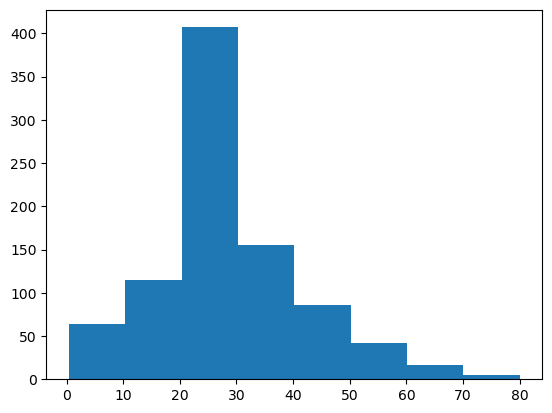

In [40]:
plt.hist(df.Age, bins = 8)

Fill Embarked column missing values

In [41]:
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Encoding
## Convert categorical data into numbers
Encode embarked column

In [43]:
df['Embarked'] = df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


Encode sex column

In [44]:
x = pd.get_dummies(df.Sex)
x.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [45]:
df['Female'] = x.female
df['Male'] =  x.male
# dropping sex column
df.drop('Sex', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1


# Feature Engineering
## Feature extraction
Extract a feature from cabin column to check it's correlation with survived column

In [46]:
df['CabinKnown']= df['Cabin'].isnull().apply(lambda x: 0 if x is True else 1)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male,CabinKnown
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0


Drop cabin column because it has more than 70% missing values

In [47]:
df.drop('Cabin', axis=1, inplace=True)

Check the correlation of cabinKnown column with survival

<AxesSubplot:>

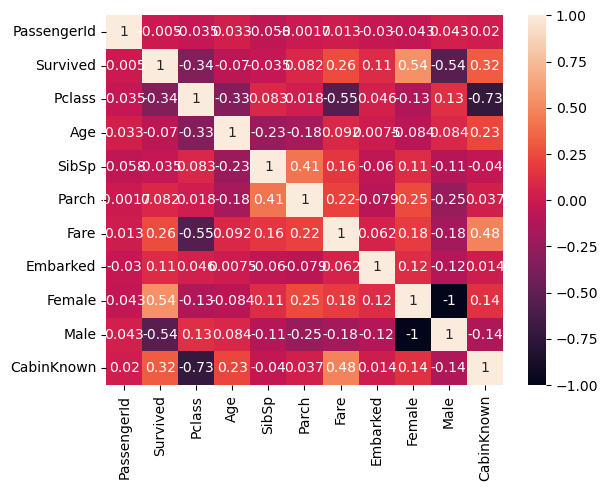

In [48]:
sb.heatmap(df.corr(), annot=True)

Check survival rate in cabin known column

<AxesSubplot:xlabel='CabinKnown', ylabel='Survived'>

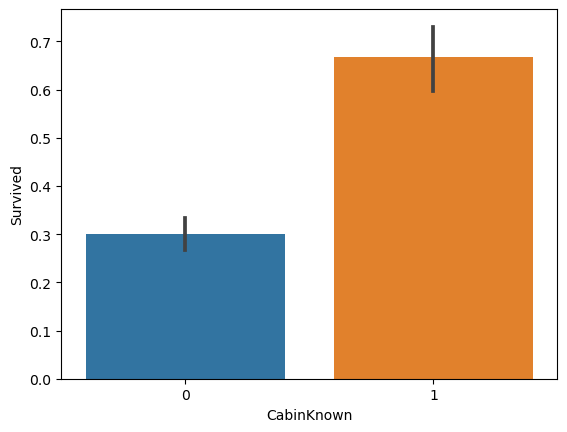

In [49]:
sb.barplot(x='CabinKnown', y='Survived', data=df)

Extract new column from parch + sibsp to know if a person was alone or with family

In [50]:
df['IsAlone']=(df["SibSp"]+df["Parch"]).apply(lambda x: 0 if x>0 else 1)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Female,Male,CabinKnown,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1


Extract new column from parch + sibsp to know the family size

In [51]:
df['FamilySize']=df["SibSp"]+df["Parch"]+1
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Female,Male,CabinKnown,IsAlone,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,0,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1,1


Check correlation of new columns with survived column

<AxesSubplot:>

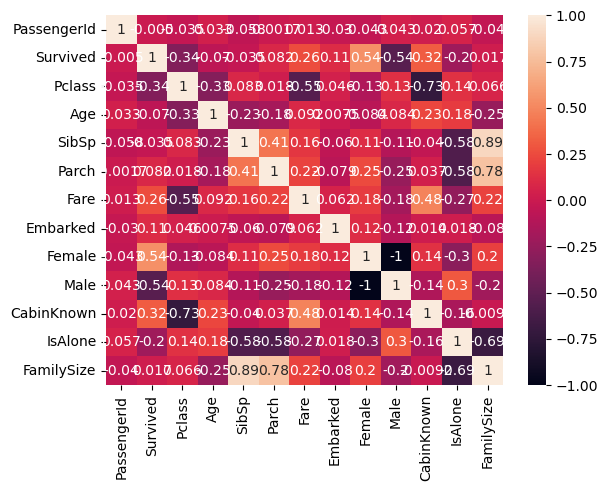

In [52]:
sb.heatmap(df.corr(), annot=True)

# Age Group

* (I) Infant = 0-1 year.
* (TR) Toddler = 2-4 yrs.
* (C) Child = 5-12 yrs.
* (T) Teen = 13-19 yrs.
* (A) Adult = 20-39 yrs.
* (MA) Middle Age Adult = 40-59 yrs.
* (SA) Senior Adult = 60+

In [53]:
bins = [0, 1, 4, 12, 19, 39, 59, df.Age.max()]
age_group = ['I', 'TR', 'C', 'T', 'A', 'MA', 'SA']

In [54]:
age = df.Age
Age_Cat = pd.cut(age, bins, labels=age_group, include_lowest=True)

In [55]:
df['Age_Group'] = Age_Cat
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Female,Male,CabinKnown,IsAlone,FamilySize,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,2,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,0,1,0,2,A
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1,1,A
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0,1,0,2,A
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1,1,A


# Fair rates

In [56]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [57]:
df.Fare[df.Fare == 0].size

15

In [58]:
df.Fare[df.Fare <= 31].size

669

In [59]:
df.Fare[df.Fare > 31].size

222

In [60]:
df.Fare[df.Fare > 31].describe()

count    222.000000
mean      88.677872
std       74.163197
min       31.275000
25%       46.900000
50%       69.550000
75%       91.079200
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare'>

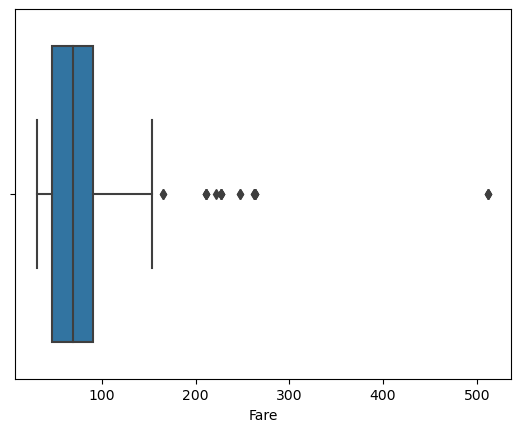

In [61]:
sb.boxplot(x = df.Fare[df.Fare > 31])

In [62]:
df.Fare[df.Fare > 91].size

57

In [63]:
def fare_rate(fare):
  if fare == 0:
    return 'No Fare'
  elif fare <= 31:
    return 'Normal'
  elif fare > 31 and fare <= 91:
    return 'Silver'
  else:
    return 'Gold'

In [64]:
df['Fare_Class'] = df.apply(lambda x: fare_rate(x.Fare), axis=1)

<AxesSubplot:xlabel='Fare_Class', ylabel='count'>

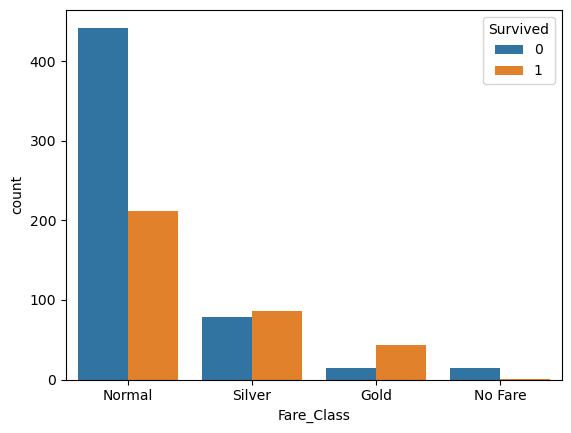

In [65]:
sb.countplot(x='Fare_Class',hue='Survived',data=df)

# Final Dataset

In [66]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Female,Male,CabinKnown,IsAlone,FamilySize,Age_Group,Fare_Class
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,0,1,0,0,2,A,Normal
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,1,0,1,0,2,A,Silver
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1,1,A,Normal
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,1,0,1,0,2,A,Silver
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,0,1,0,1,1,A,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,0,0,1,0,1,1,A,Normal
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,1,0,1,1,1,T,Normal
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,1,0,0,0,4,A,Normal
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,0,1,1,1,1,A,Normal


# Summary

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    int64   
 10  Female       891 non-null    uint8   
 11  Male         891 non-null    uint8   
 12  CabinKnown   891 non-null    int64   
 13  IsAlone      891 non-null    int64   
 14  FamilySize   891 non-null    int64   
 15  Age_Group    891 non-null    category
 16  Fare_Class   891 non-null    object  
dtypes: category(1), float64(2), int64(9), object(3), uint8(2)
memory usage: 1

# Statistical summary

In [69]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female,Male,CabinKnown,IsAlone,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.361392,0.352413,0.647587,0.228956,0.602694,1.904602
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.635673,0.477990,0.477990,0.420397,0.489615,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,1.000000,1.000000,1.000000,11.000000
